In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

### 데이터를 불러온다.

In [2]:
train_df = pd.read_csv('data/train100.csv')
test_df = pd.read_csv('data/test100.csv')

display(train_df)
display(test_df)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,LastName,Title,Ages,FareGrade,CabinArea
0,0.0,3,male,1,0,7.2500,S,Braund,Mr,20.0,41,F
1,1.0,1,female,1,0,71.2833,C,Cumings,Mrs,30.0,8,C
2,1.0,3,female,0,0,7.9250,S,Heikkinen,Miss,20.0,42,G
3,1.0,1,female,1,0,53.1000,S,Futrelle,Mrs,30.0,8,C
4,0.0,3,male,0,0,8.0500,S,Allen,Mr,30.0,43,E
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,0,0,13.0000,S,Montvila,Rev,20.0,23,D
887,1.0,1,female,0,0,30.0000,S,Graham,Miss,10.0,4,B
888,0.0,3,female,1,2,23.4500,S,Johnston,Miss,20.0,42,G
889,1.0,1,male,0,0,30.0000,C,Behr,Mr,20.0,5,C


,Pclass,Sex,SibSp,Parch,Fare,Embarked,LastName,Title,Ages,FareGrade,CabinArea
0,3,male,0,0,7.8292,Q,Kelly,Mr,30.0,43,E
1,3,female,1,0,7.0000,S,Wilkes,Mrs,40.0,46,F
2,2,male,0,0,9.6875,Q,Myles,Mr,60.0,31,F
3,3,male,0,0,8.6625,S,Wirz,Mr,20.0,41,F
4,3,female,1,1,12.2875,S,Hirvonen,Mrs,20.0,42,G
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,0,0,8.0500,S,Spector,Mr,20.0,41,F
414,1,female,0,0,108.9000,C,Oliva y Ocana,Dona,30.0,8,C
415,3,male,0,0,7.2500,S,Saether,Mr,30.0,43,E
416,3,male,0,0,8.0500,S,Ware,Mr,20.0,41,F


### 학습을 시킬 컬럼을 선택한다.

- 입력데이터 X 컬럼들은 독립 변수라고 부른다.
- 결과데이터 y는 종속 변수라고 부른다.
- 독립 변수 X 에 있는 컬럼들은 다른 컬럼간의 상관관계가 낮은 것이 좋다.
- 결과데이터 y는 X 는 컬럼과 상관관계가 높은 것이 좋다.
- 독립변수간 강한 상관관계를 가지고 있는 것은 다중 공선성의 문제라고 부란다.

In [3]:
# 문자열 데이터를 숫자로 변환한다.
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()

encoder1.fit(train_df['Sex'])
encoder2.fit(train_df['Embarked'])
encoder3.fit(train_df['LastName'])
encoder4.fit(train_df['Title'])
encoder5.fit(train_df['CabinArea'])

train_df['Sex'] = encoder1.transform(train_df['Sex'])
train_df['Embarked'] = encoder2.transform(train_df['Embarked'])
train_df['LastName'] = encoder3.transform(train_df['LastName'])
train_df['Title'] = encoder4.transform(train_df['Title'])
train_df['CabinArea'] = encoder5.transform(train_df['CabinArea'])

train_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,LastName,Title,Ages,FareGrade,CabinArea
0,0.0,3,1,1,0,7.2500,2,73,11,20.0,41,5
1,1.0,1,0,1,0,71.2833,0,136,12,30.0,8,2
2,1.0,3,0,0,0,7.9250,2,251,8,20.0,42,6
3,1.0,1,0,1,0,53.1000,2,198,12,30.0,8,2
4,0.0,3,1,0,0,8.0500,2,11,11,30.0,43,4
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,1,0,0,13.0000,2,406,14,20.0,23,3
887,1.0,1,0,0,0,30.0000,2,221,8,10.0,4,1
888,0.0,3,0,1,2,23.4500,2,293,8,20.0,42,6
889,1.0,1,1,0,0,30.0000,0,52,11,20.0,5,2


In [4]:
# 상관 계수를 확인한다.
train_df.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,LastName,Title,Ages,FareGrade,CabinArea
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,-0.167675,-0.058100,-0.193635,-0.046689,-0.349848,-0.139557
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,0.162098,0.052529,0.029099,-0.378079,0.984426,0.812938
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.108262,0.020991,0.250075,0.077431,0.121104,-0.122883
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,0.068230,-0.016098,-0.200046,-0.233986,0.047226,0.085483
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,0.039798,-0.047632,-0.126422,-0.168921,-0.004502,0.061237
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,-0.224719,-0.048075,-0.077461,0.113823,-0.555227,-0.510242
Embarked,-0.167675,0.162098,0.108262,0.068230,0.039798,-0.224719,1.000000,-0.005877,0.072621,-0.015967,0.165324,0.188208
LastName,-0.058100,0.052529,0.020991,-0.016098,-0.047632,-0.048075,-0.005877,1.000000,-0.013590,0.036140,0.061962,0.042484
Title,-0.193635,0.029099,0.250075,-0.200046,-0.126422,-0.077461,0.072621,-0.013590,1.000000,0.260014,0.072248,-0.009584
Ages,-0.046689,-0.378079,0.077431,-0.233986,-0.168921,0.113823,-0.015967,0.036140,0.260014,1.000000,-0.212347,-0.349422


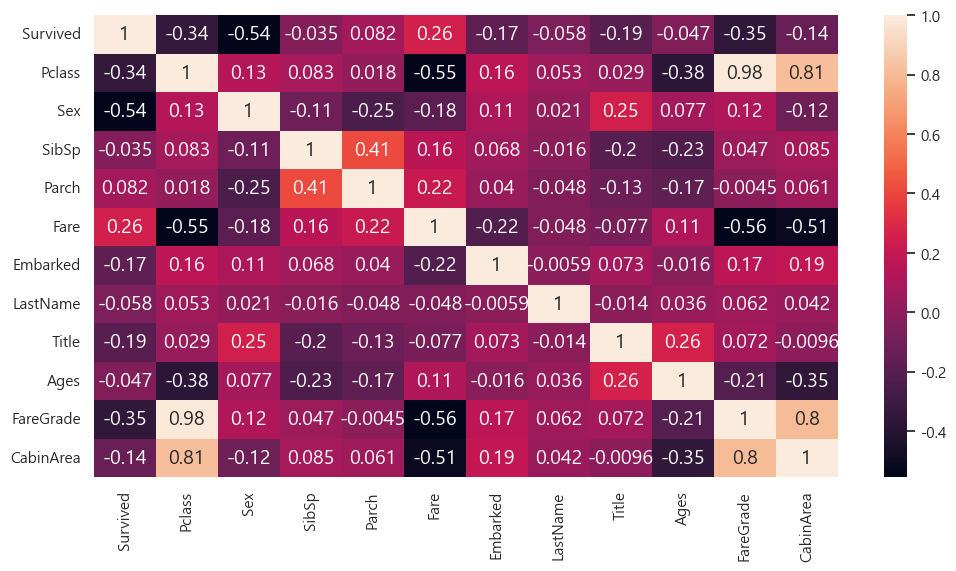

In [5]:
sns.heatmap(train_df.corr(), annot=True)
plt.show()

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 독립변수만 가져온다.
# vif_X = train_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'LastName', 'Title', 'Ages', 'FareGrade', 'CabinArea']]
# vif_X = train_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'LastName', 'Title', 'Ages', 'CabinArea']]
vif_X = train_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'LastName', 'Title', 'Ages']]
# vif_X = train_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'LastName', 'Title', 'Ages', 'Fare']]

# vif를 계산하기 위해 사용할 상수항을 추가한다.
vif_X2 = sm.add_constant(vif_X)

# vif를 계산한다
vif = pd.DataFrame()
vif['변수'] = vif_X2.columns
vif['VIF'] = [variance_inflation_factor(vif_X2.values, i) for i in range(vif_X2.shape[1])]
vif

,변수,VIF
0,const,48.411679
1,Pclass,1.251905
2,Sex,1.154380
3,SibSp,1.275927
4,Parch,1.279949
5,Embarked,1.047492
6,LastName,1.009652
7,Title,1.175142
8,Ages,1.333959


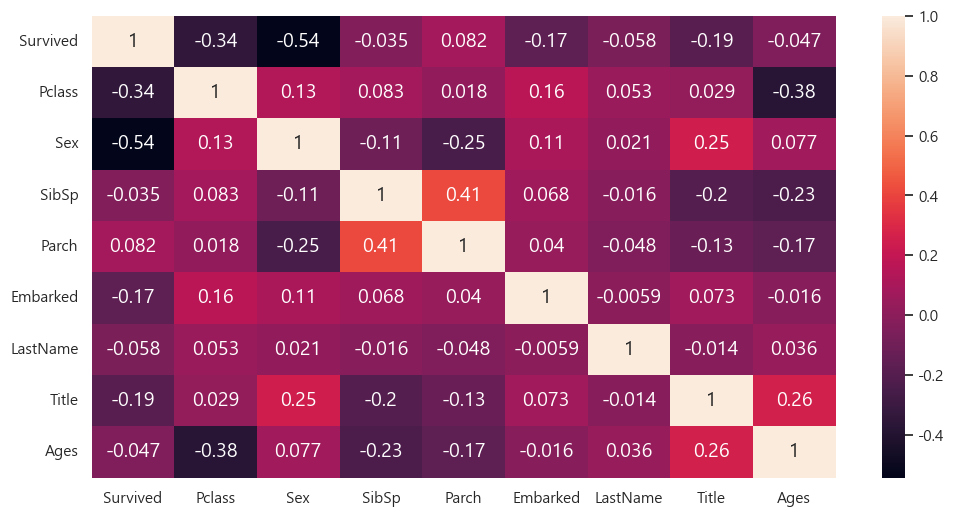

In [12]:
# VIF 계수가 높은 컬럼은 제외하고 나머지들만 가지고 결과 데이터와의 상관관계를 다시 살펴본다.
a1 = train_df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'LastName', 'Title', 'Ages']].corr()
sns.heatmap(a1, annot=True)
plt.show()

- 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'LastName', 'Title', 'Ages' 컬럼만 이용하여 학습을 진행해 본다